In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cv_df = pd.read_csv(r'C:\Users\Cohan\Documents\שבתון צחי\Resumes\DB2\DB2_CV')

In [3]:
cv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29783 entries, 0 to 29782
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  29783 non-null  object
 1   CV        29783 non-null  object
dtypes: object(2)
memory usage: 465.5+ KB


In [4]:
pd.set_option('max_colwidth', 400)

In [196]:
len(cv_df)

29783

In [5]:
clean_cv_df = cv_df
for i in range(0,len(cv_df)-1):
    clean_cv_df.Category[i] = cv_df.Category[i]
    clean_cv_df.CV[i] = cv_df.CV[i].rpartition('</span> ')[2]

In [6]:
clean_cv_df

,Category,CV
0,['Database_Administrator'],"Database Administrator - Family Private Care LLC Lawrenceville, GA A self-motivated Production SQL Server Database Administrator who possesses strong analytical and problem solving skills. My experience includes SQL Server 2005, 2008 and 2012, 2014, SSIS, as well as clustering, mirroring, and high availability solutions in OLTP environments. I am proficient in database backup, recovery, pe..."
1,['Database_Administrator'],"sql server database administrator Houston, TX DATABASE ADMINISTRATOR Over five years of experience in database management systems administration, expert at developing and maintaining database, with strong background of working on high-end servers. I would like to establish a fulfilling, proactive career and assume every increasing responsibility in the course of time. Work Experience Database..."
2,['Database_Administrator'],"Oracle Database Administrator - Cognizant hyderabad Carrier Objective: To Obtain a Oracle DBA Position in a progressive Company Where I Can Utilise and Enhance my Experience and Knowledge in Constituting Effectively to the Success of the Organization, and also to Improve my Further Technical and Professional Skills. Profile Summary:  Over 4+ years of Experience as Architecture.  Experien..."
3,['Database_Administrator'],"and ETL Developer, Business Intelligence ETL Developer and Database Administrator Plantation, FL To work as database administrator, implementing this role appropriately and effectively in the organizations Authorized to work in the US for any employer Work Experience Amazon Redshift Administrator and ETL Developer, Business Intelligence MSP Recovery - Fort Lauderdale, FL February 2018 to Prese..."
4,['Database_Administrator'],"Scrum Master Scrum Master Scrum Master Richmond, VA Work Experience Scrum Master Quest Technologies - Washington, DC October 2015 to April 2019 Responsibilities: Organize and facilitate Scrum ceremonies and backlog refinement under minimal supervision  Champion Agile software development best practices, acting as a coach to the Scrum teams  Support the Product Owner in grooming and mainta..."
...,...,...
29778,"['Java_Developer', 'Web_Developer', 'Software_Developer']","ServiceNow Developer - Vertex Pharmaceuticals Boston, MA  8 Years of IT experience in Software Design, Development, Analysis, Testing and Implementation  End to End Development and Customization of ITSM and Non ITSM applications per ITIL.  A ServiceNow Technology Analyst with experience on implementing end-to-end Service Catalog, Incident Management, Configuration & Asset Management, Chan..."
29779,"['Web_Developer', 'Software_Developer']","Android Developer - HCL America/Samsung Keller, TX Work Experience Android Developer HCL America/Samsung September 2018 to Present Berkley Heights, NJ Responsibilities:  Working in team of Android Developers, team lead and User interface design team on Samsung applications. Have to make sure the applications are developed in compliance with company global requirements. Follow company secu..."
29780,"['Software_Developer', 'Front_End_Developer', 'Web_Developer']","UI Developer - Cotiviti Health Care Blue Bell, PA  Around 6 years of experience in the Web Applications Development using HTML 4.01/5, CSS (2/3), XHTML, JavaScript, Angular JS,JQuery, AJAX, XML and JSON.  Experience with full software development life-cycle, architecting scalable platforms, object oriented programming, and agile methodologies  Strong experience with JQuery, JQuery plugins..."
29781,"['Web_Developer', 'Software_Developer']","Los Angeles, CA Work Experience Web Developer self employed September 2013 to July 2019  Creating design for basic portfolio to company website  Creating websites using standard HTML/CSS  Have an experience with UX/UI  Experience with typography and text optimization for better link working on a website  Basic knowledge of SEO  Basic experience of JS, JQ, PHP and database systems s..."


In [132]:
clean_cv_df.Category.replace("['']",'Unknown',inplace=True)

In [133]:
# Finding max categories per cv
cat_counts = [len(cat_list.split()) for cat_list in clean_cv_df.Category]
max(cat_counts)

7

In [134]:
# Finding categories distribution
cat_split = pd.DataFrame([cat_list.lower().replace('[','').replace(']','').replace("'",'').split(', ') for cat_list in clean_cv_df.Category])

In [137]:
cat_counts1 = pd.DataFrame(cat_split[0].value_counts())
cat_counts2 = pd.DataFrame(cat_split[1].value_counts())
cat_counts3 = pd.DataFrame(cat_split[2].value_counts())
cat_counts4 = pd.DataFrame(cat_split[3].value_counts())
cat_counts5 = pd.DataFrame(cat_split[4].value_counts())
cat_counts6 = pd.DataFrame(cat_split[5].value_counts())

In [138]:
cat_counts1

,0
software_developer,5828
systems_administrator,4182
project_manager,3527
web_developer,3466
database_administrator,2784
java_developer,2418
python_developer,2311
network_administrator,2260
security_analyst,2259
unknown,748


In [139]:
cat_counts = cat_counts1
cat_counts = cat_counts.join(cat_counts2,how='left')
cat_counts = cat_counts.join(cat_counts3,how='left')
cat_counts = cat_counts.join(cat_counts4,how='left')
cat_counts = cat_counts.join(cat_counts5,how='left')
cat_counts = cat_counts.join(cat_counts6,how='left')

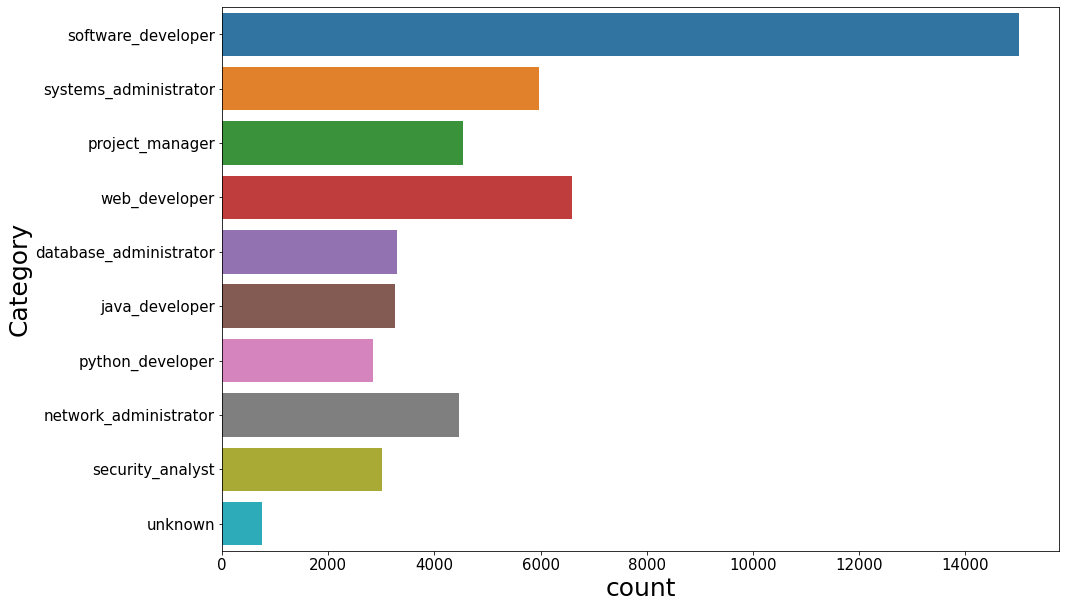

In [174]:
# Plotting the distribution of Categories as a Count Plot

plt.figure(figsize = (15,10))
cv_plot = sns.barplot(y=list(categories_sum.index), x = categories_sum.Counts)
cv_plot.set_xlabel('count',fontsize=25);
cv_plot.set_ylabel('Category',fontsize=25);
cv_plot.tick_params(labelsize=15);

In [9]:
len(clean_cv_df[list([cv.lower().find('address')>0 for cv in clean_cv_df.CV])])

3720

In [43]:
demographic_list = ['address','gender','female','male','birth',' age','academic','location']
for i in range(0,len(demogrphic_list)):
    print('CV with \'',
          demographic_list[i],
          '\' notation: ',
          len(clean_cv_df[list([cv.lower().find(demographic_list[i])>0 for cv in clean_cv_df.CV])]),
         sep='')

CV with 'address' notation: 3720
CV with 'gender' notation: 45
CV with 'female' notation: 15
CV with 'male' notation: 41
CV with 'birth' notation: 77
CV with ' age' notation: 5455
CV with 'academic' notation: 795


In [46]:
[str(cv)[cv.lower().find('male')-10:cv.lower().find('male')+30] for cv in clean_cv_df.CV]

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'mber 2013 Male Revue Dancer Labare - Dal',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',


In [33]:
mystr=str(clean_cv_df.CV[0])

In [37]:
mystr[1:4]

'ata'